<a href="https://colab.research.google.com/github/gagabriela2787/Grupo7ISPC/blob/SilviaCarinaMonzon/G7Nacidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis Nacidos Vivos Registrados 2018


# **RECOLECCIÓN Y PREPARACIÓN DE DATOS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:

# URL del archivo CSV
url = 'https://raw.githubusercontent.com/gagabriela2787/Grupo7ISPC/main/nacidos-vivos-registrados-2018_deis.csv'

# Leer el archivo CSV desde la URL
df = pd.read_csv(url)

# **ANÁLISIS EXPLORATORIO**


In [ ]:
# Tamaño de la matriz de datos (filas, columnas)
df.shape

(30099, 15)

In [ ]:
# Mostrar todas las columnas
print(df.columns)

Index(['jurisdiccion_de_residencia_id', 'jurisdiccion_de_residencia_nombre',
       'tipo_de_parto_id', 'tipo_de_parto_nombre', 'sexo', 'sexo_nombre',
       'edad_de_la_madre_grupos_id', 'edad_de_la_madre_grupos_nombre',
       'semanas_de_gestacion_id', 'semanas_de_gestacion_nombre',
       'instruccion_de_la_madre_id', 'instruccion_de_la_madre_nombre',
       'Intervalos_de_peso_al_nacer_id', 'intervalos_de_peso_al_nacer_nombre',
       'cantidad_nacimientos'],
      dtype='object')


In [ ]:
#Primera descripción general de los datos
df.describe()

,jurisdiccion_de_residencia_id,tipo_de_parto_id,sexo,edad_de_la_madre_grupos_id,semanas_de_gestacion_id,instruccion_de_la_madre_id,Intervalos_de_peso_al_nacer_id,cantidad_nacimientos
count,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000
mean,42.405528,1.226120,1.663610,4.524968,5.487093,4.772351,5.763015,22.771321
std,30.808996,0.739671,1.204007,1.831169,1.155895,1.844638,1.850774,122.235335
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,1.000000,1.000000,3.000000,5.000000,3.000000,5.000000,1.000000
50%,38.000000,1.000000,2.000000,4.000000,6.000000,5.000000,6.000000,2.000000
75%,70.000000,1.000000,2.000000,6.000000,6.000000,6.000000,7.000000,7.000000
max,99.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,4512.000000


# **PROCESAMIENTO Y ANÁLISIS DE DATOS**


In [ ]:
# Consulta: Obtener los nombres únicos de las provincias en el DataFrame
provincias = df['jurisdiccion_de_residencia_nombre'].unique()

In [ ]:
#mostrar al usuario el nombre de las provincias del dataFrame, para que seleccione una y obtenga la informacion que
#requiere de dicha provincia
print("Solicitar datos de una provincia")

# Consulta: Obtener los nombres únicos de las provincias en el DataFrame
provincias = df['jurisdiccion_de_residencia_nombre'].unique()

# Mostrar los nombres únicos de las provincias
print("Nombres de las provincias presentes en el dataset:")
for pro in provincias:
    print(pro)

# Solicitar al usuario el ingreso de un provincia
provincia_ingresada = input("Ingrese el nombre de una provincia tal cual el listado anterior: ")

# Verificar si la provincia existe en el DataFrame
if provincia_ingresada in df['jurisdiccion_de_residencia_nombre'].unique():
    #creo el dataFrame con los registros de la provincia correspondiente
    registros = df[df['jurisdiccion_de_residencia_nombre'] == provincia_ingresada]
    # Solicitar al usuario el ingreso de una opcion
    print("Menu:")
    print("1- Cantidad de nacimientos")
    print("2-Cantidad de nacimientos simples")
    print("3-Cantidad de nacimientos dobles")
    opcion_ingresada = input("Ingrese una opcion del menu: ")
    opcion=int (opcion_ingresada)
    match opcion:
        case 1:
             print("Cantidad de nacimientos")
             suma_nacimientos=registros['cantidad_nacimientos'].sum()
             print("La cantidad de nacimientos en "+provincia_ingresada+" es: "+str(suma_nacimientos))

        case 2:
            print("Cantidad de nacimientos simples")
            # Inicializamos la variable 'sumaSimple' en 0
            sumaSimple = 0
            # Iteramos sobre las filas del DataFrame
            for index, row in registros.iterrows():
              if row['tipo_de_parto_id'] == 1:
                sumaSimple+= row['cantidad_nacimientos']
            print("La cantidad de nacimientos SIMPLES en "+provincia_ingresada+" es: "+str(sumaSimple))
        case 3:
            print("Cantidad de nacimientos dobles")
            # Inicializamos la variable 'sumaDobles' en 0
            sumaDobles = 0
            # Iteramos sobre las filas del DataFrame
            for index, row in registros.iterrows():
              if row['tipo_de_parto_id'] == 23:
                sumaDobles+= row['cantidad_nacimientos']
            print("La cantidad de nacimientos DOBLES en "+provincia_ingresada+" es: "+str(sumaDobles))
        case _:print("Error: La opcion ingresada no es correcta")


else:
      print("La provincia ingresada no se encuentra en el dataset.")

In [3]:
# Ejecutar éste codigo para crear un dataframe con letra y nombre de cada provincia
Letra=["B","C","K","H","U","X","W","E","P","Y","L","F","M","N","Q","R","A","J","D","Z","S","G","V","T"]
Nombre=["Buenos Aires","Ciudad Aut. de Buenos Aires","Catamarca","Chaco","Chubut",
        "Córdoba","Corrientes","Entre Ríos","Formosa","Jujuy",
        "La Pampa","La Rioja","Mendoza","Misiones","Neuquén",
        "Río Negro","Salta","San Juan","San Luis","Santa Cruz",
        "Santa Fe","Santiago del Estero","Tierra del Fuego","Tucumán"]
df_Letra=pd.DataFrame(
    {"Letra": Letra,
     "Nombre": Nombre})
print(df_Letra)

   Letra                       Nombre
0      B                 Buenos Aires
1      C  Ciudad Aut. de Buenos Aires
2      K                    Catamarca
3      H                        Chaco
4      U                       Chubut
5      X                      Córdoba
6      W                   Corrientes
7      E                   Entre Ríos
8      P                      Formosa
9      Y                        Jujuy
10     L                     La Pampa
11     F                     La Rioja
12     M                      Mendoza
13     N                     Misiones
14     Q                      Neuquén
15     R                    Río Negro
16     A                        Salta
17     J                     San Juan
18     D                     San Luis
19     Z                   Santa Cruz
20     S                     Santa Fe
21     G          Santiago del Estero
22     V             Tierra del Fuego
23     T                      Tucumán


In [4]:
# Unir dataframe df_letra con el df original con datos
df_Union = pd.merge(left=df_Letra, right=df, how="inner", left_on="Nombre", right_on="jurisdiccion_de_residencia_nombre")
df_Union.head()

,Letra,Nombre,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,B,Buenos Aires,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
1,B,Buenos Aires,6,Buenos Aires,2,Múltiple,1,Varón,2,15 a 19,5,32 a 36,5,Secundaria/Polimodal Completa,3,1000 a 1499,1
2,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,5,30 a 34,6,37 a 41,3,Primaria/C. EGB Completa,7,3000 a 3499,3
3,B,Buenos Aires,6,Buenos Aires,1,Simple,9,Sin espeficar,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,7,3000 a 3499,2
4,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,8,De 45 y más,3,24 a 27,8,Sin especificar,4,1500 a 1999,1


In [5]:
# Explorar la distribución de nacimientos en 2018 por provincias discriminado por sexo

# Seleccionar los nacimientos de Varón por provincia
varon_count = df_Union[df_Union['sexo_nombre'] == 'Varón'].groupby('Letra')['cantidad_nacimientos'].sum()
print(varon_count)

# Seleccionar los nacimientos de Mujer por provincia
mujer_count = df_Union[df_Union['sexo_nombre'] == 'Mujer'].groupby('Letra')['cantidad_nacimientos'].sum()
print(mujer_count)

Letra
A     12819
B    126505
C     18362
D      3524
E     10857
F      2909
G      9309
H     12586
J      6902
K      3384
L      2450
M     15306
N     12592
P      6077
Q      5157
R      5510
S     26249
T     14279
U      4331
V      1398
W     10100
X     27554
Y      5955
Z      2629
Name: cantidad_nacimientos, dtype: int64
Letra
A     12384
B    118782
C     17096
D      3526
E     10424
F      2754
G      8759
H     12196
J      6596
K      3312
L      2323
M     14779
N     12265
P      5732
Q      4965
R      5161
S     25161
T     13636
U      4208
V      1290
W      9748
X     26015
Y      5852
Z      2482
Name: cantidad_nacimientos, dtype: int64


In [6]:
# Ejecutar éste Codigo para crear un Array con Tipo de Nacimiento y Descripción
Tipo = ["1", "2", "3"]
Descripcion = ["Prematuros", "A término", "Sin especificar"]
Total_M = [0,0,0]
Total_V = [0,0,0]
Total = [0,0,0]



*   **Nacimientos Prematuros**: Hasta menos de 37 semana de gestación inclusive.
*   **Nacimientos a Término**: Después de semana 38 inclusive.

Los códigos de semanas_de_gestacion_id son: **. 1** 'Menos de 22' **. 2** '22 a 23' **. 3** '24 a 27' **. 4** '28 a 31' **. 5** '32 a 36' **. 6** '37 a 41' **. 7** '42 y más' **. 8** 'Sin especificar'

In [7]:
# Agrupar según semanas_de_gestacion_id y sumar los nacimientos correspondientes a "prematuro", "a término" y "sin especificar" por sexo:
# MUJER
# Sumar total de nacimientos PREMATUROS MUJER
Total_M[0] = df_Union[(df_Union['semanas_de_gestacion_id'] <= 5) & (df_Union['sexo_nombre'] == 'Mujer')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos A TERMINO MUJER
Total_M[1] = df_Union[(df_Union['semanas_de_gestacion_id'] >= 6)  &  (df_Union["semanas_de_gestacion_id"]<= 7) & (df_Union['sexo_nombre'] == 'Mujer')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos SIN ESPECIFICAR MUJER
Total_M[2] = df_Union[(df_Union['semanas_de_gestacion_id'] == 8) & (df_Union['sexo_nombre'] == 'Mujer')]['cantidad_nacimientos'].sum()

# VARON
# Sumar total de nacimientos PREMATUROS VARÓN
Total_V[0] = df_Union[(df_Union['semanas_de_gestacion_id'] <= 5) & (df_Union['sexo_nombre'] == 'Varón')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos A TERMINO VARÓN
Total_V[1] = df_Union[(df_Union['semanas_de_gestacion_id'] >= 6)  &  (df_Union["semanas_de_gestacion_id"]<= 7) & (df_Union['sexo_nombre'] == 'Varón')]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos SIN ESPECIFICAR VARÓN
Total_V[2] = df_Union[(df_Union['semanas_de_gestacion_id'] == 8) & (df_Union['sexo_nombre'] == 'Varón')]['cantidad_nacimientos'].sum()

# TOTAL
# Sumar total de nacimientos PREMATUROS
Total[0]  = df_Union[df_Union['semanas_de_gestacion_id'] <= 5]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos A TERMINO
Total[1] = df_Union[(df_Union['semanas_de_gestacion_id'] >= 6)  &  (df_Union["semanas_de_gestacion_id"]<= 7)]['cantidad_nacimientos'].sum()
# Sumar total de nacimientos SIN ESPECIFICAR
Total[2] = df_Union[df_Union['semanas_de_gestacion_id'] == 8]['cantidad_nacimientos'].sum()

In [8]:
# Diferencia de cantidad de nacimientos en 2018 entre Mujeres y Varones
Diferencia_Prematuros = Total_V[0] - Total_M[0]
print('La diferencia numérica de Nacimientos Prematuros en 2018 entre mujeres y varones es de ', Diferencia_Prematuros)

La diferencia numérica de Nacimientos Prematuros en 2018 entre mujeres y varones es de  3061


# **CONSULTAS Y GRÁFICOS**


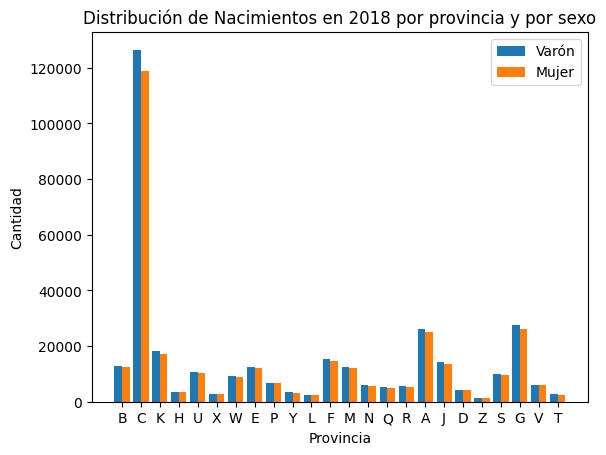

In [9]:
# GRAFICAR DISTRIBUCION DE NACIMIENTOS EN 2018 POR PROVINCIA DISCRIMINADO POR SEXO.
co = np.arange(len(df_Letra))
an = 0.40
# Definir lugar donde se realiza la gráfica y asignar parámetros
fig, ax = plt.subplots()
ax.bar(co - an/2, varon_count, an, label= 'Varón')
ax.bar(co + an/2, mujer_count, an, label= 'Mujer')

ax.set_title('Distribución de Nacimientos en 2018 por provincia y por sexo')
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad')
ax.set_xticks(co)
ax.set_xticklabels(df_Letra["Letra"])

plt.legend()
plt.show()

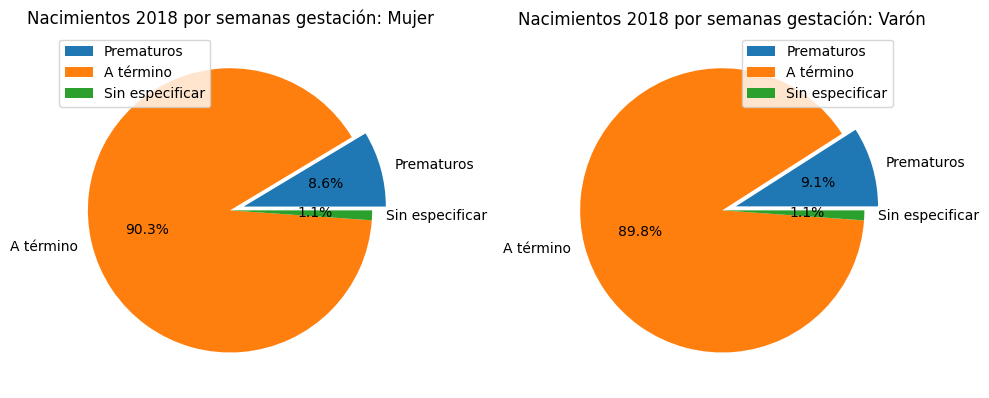

In [10]:
# GRAFICAR COMPARATIVOS DE NACIMIENTOS EN 2018 DE PREMATUROS Y A TERMINO POR SEXO.
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
explode = (0.1, 0, 0)  # Expande la primera rebanada
# Grafico de torta para Mujer
ax1.pie(Total_M, explode=explode, labels=Descripcion, autopct='%1.1f%%')
ax1.set_title('Nacimientos 2018 por semanas gestación: Mujer')

# Grafico de torta para Varón
ax2.pie(Total_V, explode=explode, labels=Descripcion, autopct='%1.1f%%')
ax2.set_title('Nacimientos 2018 por semanas gestación: Varón')
# Crear las leyendas para cada gráfico de torta
legend1 = ax1.legend(loc='upper left')
legend2 = ax2.legend(loc='upper right')

# Ajustar la disposición de los subgráficos y mostrar la figura
plt.tight_layout()
plt.show()

RESULTADOS:

# **CONCLUSIONES:**


En el gráfico de barras se observa que los nacimientos de varones es un poco mas elevado en cada provincia que el nacimiento de mujeres.

En los gráficos comparativos de acuerdo a los datos de nacimientos durante el año 2018 se observa en los gráficos de torta que los nacimientos prematuros de varones es 0,5% superior al de nacimientos prematuros de mujeres.

